
<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://databricks.com/wp-content/uploads/2018/03/db-academy-rgb-1200px.png" alt="Databricks Learning">
</div>



# Training Regression and Classification Models

In this demo, we will explore the process of training a classification model using the sklearn API. In addition to fitting the model, we will inspect the model details and show how the decision tree is constructed.

**Learning Objectives:**

*By the end of this demo, you will be able to;*

* Fit a classification model on modeling data using the sklearn API.

* Interpret a fit sklearn linear model’s coefficients and intercept.

* Fit a decision tree model using sklearn API and training data.

+ Visualize a sklearn tree’s split points.

* Identify which metrics are tracked by MLflow.



## Requirements

Please review the following requirements before starting the lesson:

* To run this notebook, you need to use one of the following Databricks runtime(s): **13.3.x-cpu-ml-scala2.12 13.3.x-scala2.12**


## Classroom Setup

Before starting the demo, run the provided classroom setup script. This script will define configuration variables necessary for the demo. Execute the following cell:

In [0]:
%run ../Includes/Classroom-Setup-01.1b

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


Resetting the learning environment:
| dropping the catalog "labuser8100238_1734654409_km6w_da"...(0 seconds)

Skipping install of existing datasets to "dbfs:/mnt/dbacademy-datasets/machine-learning-model-development/v01"

Validating the locally installed datasets:
| listing local files...(0 seconds)
| validation completed...(0 seconds total)
Creating & using the catalog "labuser8100238_1734654409_km6w_da"...(1 seconds)


2024/12/20 01:40:02 INFO databricks.feature_store._compute_client._compute_client: Setting columns ['unique_id'] of table 'labuser8100238_1734654409_km6w_da.default.diabetes_binary' to NOT NULL.
2024/12/20 01:40:04 INFO databricks.feature_store._compute_client._compute_client: Setting Primary Keys constraint ['unique_id'] on table 'labuser8100238_1734654409_km6w_da.default.diabetes_binary'.
2024/12/20 01:40:14 INFO databricks.feature_store._compute_client._compute_client: Created feature table 'labuser8100238_1734654409_km6w_da.default.diabetes_binary'.



Predefined tables in "labuser8100238_1734654409_km6w_da.default":
| diabetes_binary

Predefined paths variables:
| DA.paths.working_dir: dbfs:/mnt/dbacademy-users/labuser8100238_1734654409@vocareum.com/machine-learning-model-development
| DA.paths.datasets:    dbfs:/mnt/dbacademy-datasets/machine-learning-model-development/v01

Setup completed (22 seconds)


**Other Conventions:**

Throughout this demo, we'll refer to the object `DA`. This object, provided by Databricks Academy, contains variables such as your username, catalog name, schema name, working directory, and dataset locations. Run the code block below to view these details:

In [0]:
print(f"Username:          {DA.username}")
print(f"Catalog Name:      {DA.catalog_name}")
print(f"Schema Name:       {DA.schema_name}")
print(f"Working Directory: {DA.paths.working_dir}")
print(f"Dataset Location:  {DA.paths.datasets}")

Username:          labuser8100238_1734654409@vocareum.com
Catalog Name:      labuser8100238_1734654409_km6w_da
Schema Name:       default
Working Directory: dbfs:/mnt/dbacademy-users/labuser8100238_1734654409@vocareum.com/machine-learning-model-development
Dataset Location:  dbfs:/mnt/dbacademy-datasets/machine-learning-model-development/v01


## Prepare Dataset
Before training any machine learning models, it's crucial to prepare the dataset. In the previous section, we have covered the steps to load, clean, and preprocess the data, ensuring it's in a suitable format for model training.

### Load Dataset

In this section, we aim to optimize the process of loading the dataset by leveraging Delta Lake's feature table functionality. Instead of directly reading from the CSV file, **we created a feature table during the setup phase**. A feature table is a structured repository that organizes data for efficient retrieval and analysis. By creating a feature table, we enhance data management and simplify subsequent operations. We can then seamlessly read the data from this feature table during our analysis, promoting a more organized and scalable approach to handling datasets. This setup enhances traceability and facilitates collaboration across different stages of the data science workflow.

In [0]:
import pandas as pd
from databricks.feature_engineering import FeatureEngineeringClient

# Read dataset from the feature store table
fe = FeatureEngineeringClient()
table_name = f"{DA.catalog_name}.{DA.schema_name}.diabetes_binary"
feature_data_pd = fe.read_table(name=table_name).toPandas()
feature_data_pd = feature_data_pd.drop(columns=['unique_id'])

# Convert all columns in the DataFrame to the 'double' data type
for column in feature_data_pd.columns:
    feature_data_pd[column] = feature_data_pd[column].astype("double")

# Display the Pandas DataFrame with updated data types
display(feature_data_pd)

Diabetes_binary HighBP HighChol CholCheck BMI Smoker Stroke HeartDiseaseorAttack PhysActivity Fruits Veggies HvyAlcoholConsump AnyHealthcare NoDocbcCost GenHlth MentHlth PhysHlth DiffWalk Sex Age Education Income 0.0 1.0 0.0 1.0 26.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 3.0 5.0 30.0 0.0 1.0 4.0 6.0 8.0 0.0 1.0 1.0 1.0 26.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 3.0 0.0 0.0 0.0 1.0 12.0 6.0 8.0 0.0 0.0 0.0 1.0 26.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 10.0 0.0 1.0 13.0 6.0 8.0 0.0 1.0 1.0 1.0 28.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 3.0 0.0 3.0 0.0 1.0 11.0 6.0 8.0 0.0 0.0 0.0 1.0 29.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 0.0 8.0 5.0 8.0 0.0 0.0 0.0 1.0 18.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 2.0 7.0 0.0 0.0 0.0 1.0 4.0 7.0 0.0 0.0 1.0 1.0 26.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 13.0 5.0 6.0 0.0 0.0 0.0 1.0 31.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 4.0 0.0 0.0 0.0 1.0 6.0 4.0 3.0 0.0 0.0 0.0 1.0 32.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 3.0 0.0 0.0 0.0 0.0 3.0 6.0 8.0 0.0 0.0 0.0 1.0 27.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 3.0 0.0 6.0 0.0 1.0 6.0 4.0 4.0 0.0 1.0 1.0 1.0 24.0 1.0 0.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 3.0 0.0 4.0 0.0 0.0 12.0 4.0 6.0 0.0 0.0 0.0 1.0 21.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 4.0 6.0 8.0 0.0 1.0 1.0 1.0 27.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 1.0 7.0 6.0 8.0 0.0 1.0 0.0 1.0 58.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 3.0 3.0 3.0 0.0 1.0 10.0 4.0 6.0 0.0 0.0 1.0 1.0 29.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 10.0 5.0 1.0 0.0 0.0 0.0 1.0 18.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 3.0 0.0 0.0 0.0 0.0 10.0 4.0 6.0 0.0 0.0 0.0 1.0 30.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 0.0 9.0 5.0 7.0 0.0 0.0 0.0 1.0 30.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 10.0 6.0 7.0 0.0 0.0 0.0 1.0 20.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 0.0 8.0 6.0 8.0 0.0 1.0 0.0 1.0 26.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 3.0 0.0 15.0 0.0 1.0 7.0 5.0 5.0 0.0 0.0 0.0 1.0 22.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 6.0 6.0 8.0 0.0 1.0 0.0 1.0 29.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 5.0 0.0 30.0 0.0 1.0 10.0 5.0 8.0 0.0 0.0 0.0 1.0 22.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 2.0 0.0 0.0 0.0 0.0 8.0 6.0 8.0 0.0 0.0 0.0 1.0 30.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 9.0 4.0 6.0 0.0 0.0 1.0 1.0 27.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 3.0 4.0 30.0 0.0 0.0 10.0 4.0 3.0 0.0 0.0 1.0 1.0 28.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 2.0 2.0 1.0 0.0 1.0 8.0 5.0 8.0 0.0 1.0 0.0 1.0 20.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 2.0 0.0 3.0 0.0 0.0 12.0 6.0 7.0 0.0 1.0 1.0 1.0 32.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 4.0 0.0 4.0 0.0 0.0 9.0 4.0 6.0 0.0 0.0 0.0 1.0 38.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 2.0 2.0 2.0 0.0 0.0 6.0 5.0 7.0 0.0 0.0 1.0 1.0 40.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 0.0 7.0 5.0 8.0 0.0 1.0 1.0 1.0 24.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 4.0 30.0 14.0 1.0 0.0 4.0 5.0 1.0 0.0 0.0 0.0 1.0 24.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 2.0 5.0 0.0 0.0 0.0 3.0 5.0 3.0 0.0 0.0 0.0 1.0 20.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 3.0 0.0 2.0 0.0 1.0 4.0 4.0 7.0 0.0 0.0 0.0 1.0 20.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 4.0 0.0 4.0 0.0 0.0 4.0 5.0 2.0 0.0 1.0 1.0 1.0 29.0 1.0 0.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 1.0 11.0 5.0 6.0 0.0 0.0 1.0 1.0 24.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 20.0 0.0 0.0 0.0 9.0 4.0 6.0 0.0 0.0 0.0 1.0 25.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 1.0 5.0 6.0 8.0 0.0 0.0 0.0 1.0 36.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 1.0 7.0 6.0 6.0 0.0 0.0 1.0 1.0 31.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 1.0 6.0 5.0 8.0 0.0 0.0 1.0 1.0 27.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 11.0 5.0 8.0 0.0 0.0 0.0 1.0 26.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 3.0 1.0 0.0 0.0 0.0 8.0 5.0 8.0 0.0 0.0 1.0 1.0 27.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 1.0 8.0 6.0 8.0 0.0 1.0 1.0 1.0 47.0 1.0 0.

### Train / Test Split

The "train_test_split" function from the scikit-learn library is commonly used to split a dataset into training and testing sets. This is a crucial step in machine learning to **evaluate how well a trained model generalizes to new, unseen data**.

In [0]:
from sklearn.model_selection import train_test_split

print(f"We have {feature_data_pd.shape[0]} records in our source dataset")

# split target variable into it's own dataset
target_col = "Diabetes_binary" 
X_all = feature_data_pd.drop(labels=target_col, axis=1)
y_all = feature_data_pd[target_col]

# test / train split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=0.95, random_state=42)
print(f"We have {X_train.shape[0]} records in our training dataset")
print(f"We have {X_test.shape[0]} records in our test dataset")

We have 70692 records in our source dataset
We have 67157 records in our training dataset
We have 3535 records in our test dataset


## Fit a Classification Model

Let's go ahead and fit a Decision Tree model!

In [0]:
from math import sqrt
import mlflow.sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# turn on autologging
mlflow.sklearn.autolog(log_input_examples=True)

# fit our model
dtc = DecisionTreeClassifier()
dtc_mdl = dtc.fit(X_train, y_train)

# evaluate the test set
y_predicted = dtc_mdl.predict(X_test)
test_acc = accuracy_score(y_test, y_predicted)
test_prec = precision_score(y_test, y_predicted)
test_rec = recall_score(y_test, y_predicted)
test_f1 = f1_score(y_test, y_predicted)
print("Test evaluation summary:")
print(f"Accuracy: {test_acc}")
print(f"Precision: {test_prec}")
print(f"Recall: {test_rec}")
print(f"F1: {test_f1}")

2024/12/20 01:40:21 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f3af6e88d8c8444aac651b8288cc16a2', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Test evaluation summary:
Accuracy: 0.6554455445544555
Precision: 0.6576271186440678
Recall: 0.6554054054054054
F1: 0.6565143824027072


## Examine Model Result

Examine the **confusion matrix** to visualize the model's classification performance.

The confusion matrix provides insights into the model's performance, showing how many instances were correctly or incorrectly classified for each class.

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Computing the confusion matrix
cm = confusion_matrix(y_test, y_predicted, labels=[1, 0])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

<Figure size 800x600 with 0 Axes>


**Now we examine the resulting model**

We can extract and plot the `feature_importances_` inferred from this model to examine which data features are **the most critical for successful prediction**.

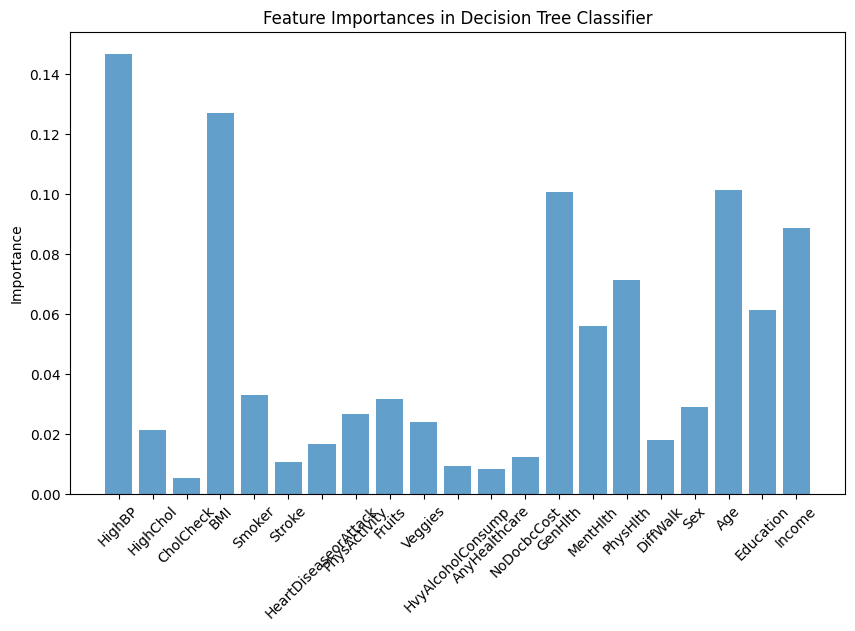

In [0]:
import numpy as np

# Retrieving feature importances
feature_importances = dtc_mdl.feature_importances_
feature_names = X_train.columns.to_list()

# Plotting the feature importances
plt.figure(figsize=(10, 6))
y_pos = np.arange(len(feature_names))
plt.bar(y_pos, feature_importances, align='center', alpha=0.7)
plt.xticks(y_pos, feature_names, rotation=45)
plt.ylabel('Importance')
plt.title('Feature Importances in Decision Tree Classifier')

plt.show()

**We can also examine the resulting tree structure**

**Decision trees make splitting decisions on different features at different critical values**, so we can visualize the resulting decision logic by plotting that branching tree structure.

In [0]:
print(f"The fitted DecisionTreeClassifier model has {dtc_mdl.tree_.node_count} nodes and is up to {dtc_mdl.tree_.max_depth} levels deep.")

The fitted DecisionTreeClassifier model has 38837 nodes and is up to 42 levels deep.


This is a very large decision tree, printing out the full tree logic, we can see it is vast and sprawling:

In [0]:
from sklearn.tree import export_text

text_representation = export_text(dtc_mdl, feature_names=feature_names)
print(text_representation)

|--- HighBP <= 0.50
|   |--- GenHlth <= 2.50
|   |   |--- Age <= 9.50
|   |   |   |--- BMI <= 28.50
|   |   |   |   |--- HighChol <= 0.50
|   |   |   |   |   |--- GenHlth <= 1.50
|   |   |   |   |   |   |--- Education <= 3.50
|   |   |   |   |   |   |   |--- Age <= 8.50
|   |   |   |   |   |   |   |   |--- Income <= 1.50
|   |   |   |   |   |   |   |   |   |--- Smoker <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- BMI <= 21.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |   |--- BMI >  21.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- Smoker >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- Income >  1.50
|   |   |   |   |   |   |   |   |   |--- PhysActivity <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Sex <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |   |-

This plot will give you a visual representation of the decision tree structure, helping us to understand how the model makes predictions based on different features and their critical values.

Since it is so big, we can only reasonably visualize a small portion of the tree at any given time. Here is the root and first 2 levels:

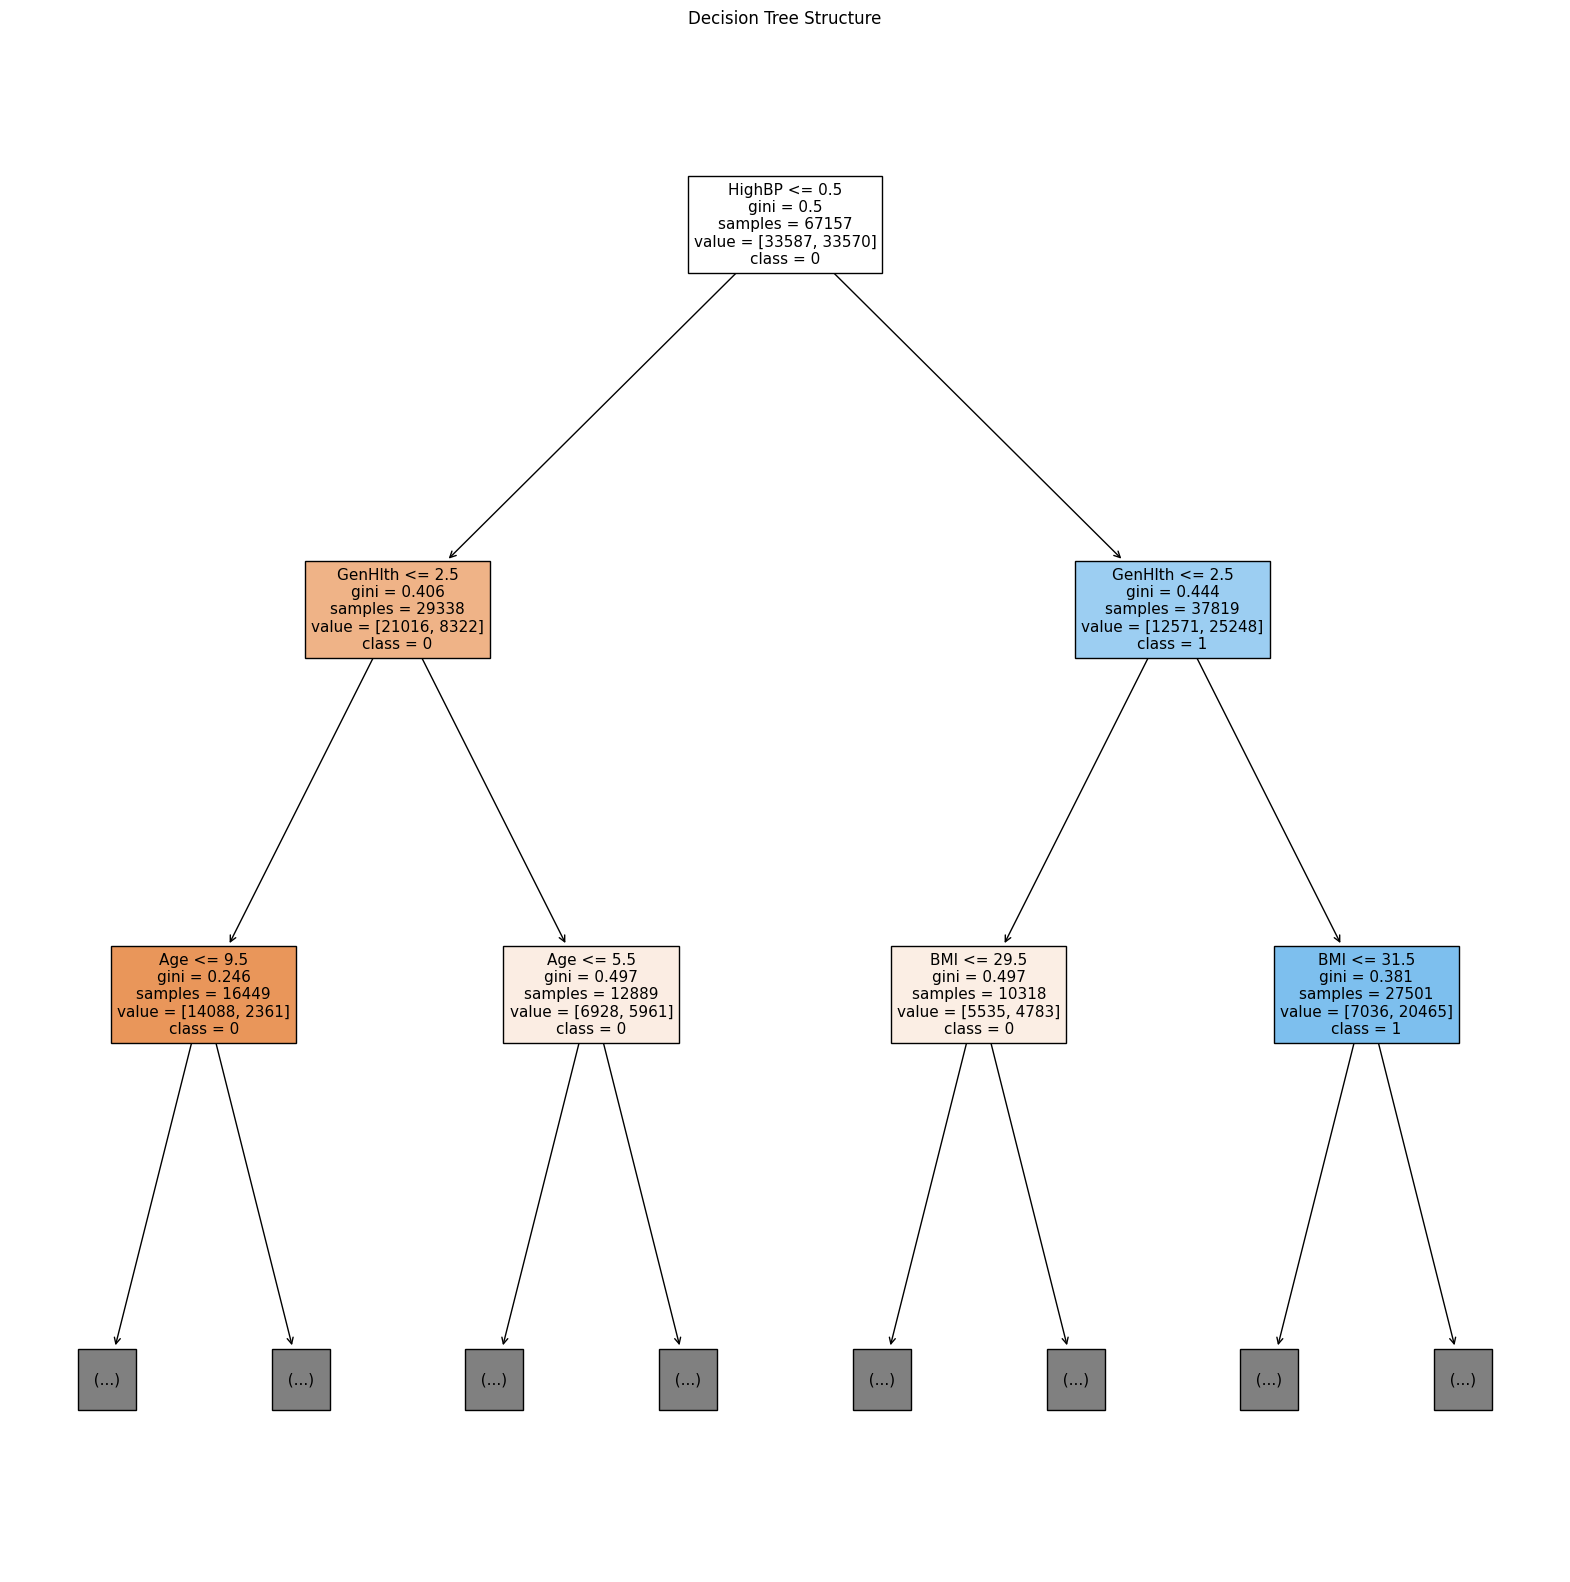

In [0]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(dtc_mdl, 
          feature_names=feature_names,
          max_depth=2,
          class_names=['0', '1'], 
          filled=True)
plt.title('Decision Tree Structure')
plt.show()


## Clean up Classroom

Run the following cell to remove lessons-specific assets created during this lesson.

In [0]:
DA.cleanup()

Resetting the learning environment:
| dropping the catalog "labuser8100238_1734654409_km6w_da"...(0 seconds)

Validating the locally installed datasets:
| listing local files...(0 seconds)
| validation completed...(0 seconds total)



## Conclusion

This demonstration guided us through the process of training and evaluating a Decision Tree classification model for predicting diabetes. We started by preparing the dataset, conducting a train/test split, and fitting the model. The examination of the confusion matrix provided insights into the model's classification performance, and the visualization of the decision tree's structure and feature importances offered a deeper understanding of the underlying decision-making process.


&copy; 2024 Databricks, Inc. All rights reserved.<br/>
Apache, Apache Spark, Spark and the Spark logo are trademarks of the 
<a href="https://www.apache.org/">Apache Software Foundation</a>.<br/>
<br/><a href="https://databricks.com/privacy-policy">Privacy Policy</a> | 
<a href="https://databricks.com/terms-of-use">Terms of Use</a> | 
<a href="https://help.databricks.com/">Support</a>